# Assignment Goals

Assignment 6 requires you to implement gradient descent based optimization.  

- Minimum requirement: adapt the code from the presentation to optimize as many of the functions below as possible.
- Write a generic function that will take in 2 other functions as input, and a range of values within which to search, and then implement gradient descent to find the optimum.  The basic requirements of gradient descent are already available in the presentation.
-  For some assignments, the gradient has not been given.  You can either write the function on your own, or suggest other methods that can achieve this purpose.

## Problem 1 - 1-D simple polynomial

The gradient is not specified.  You can write the function for gradient on your own.  The range within which to search for minimum is [-5, 5].

In [66]:
# Importing required libraries and module 
import numpy as np
from numpy import cos, sin, pi, exp 
%matplotlib ipympl
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import cm

In this section we are importing the required modules like 'numpy', 'matplotlib' etc.

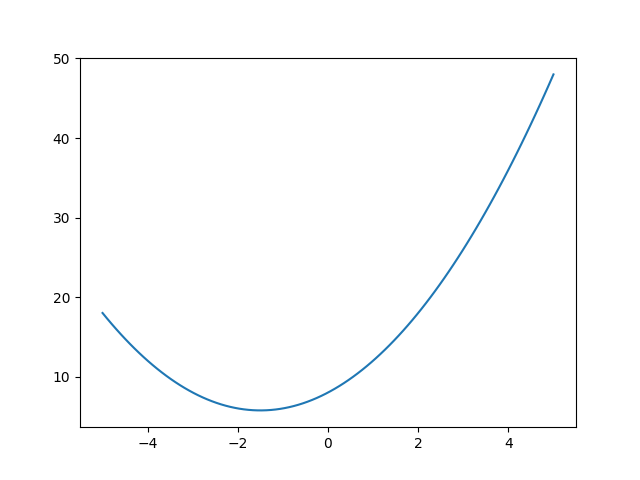

In [67]:
# defining single variable polynoimal function 
def f1(x):
    return x ** 2 + 3 * x + 8

# defining the derivative function of the polynomial function
def df1_dx(x):
    return 2 * x + 3

# setting the x-axis and y-axis values in the given limit
x_value1 = np.linspace(-5 , 5, 100)
y_value1 = f1(x_value1)

# plotting the function
plt.plot(x_value1 , y_value1)
plt.show()

In this sectionn we define the given single variable polynomial function f1(), which has to be optimized. 
After that we define another function df1_dx, which is the derivative function of f1() function.

Then we generate random input array for x-axis values and by putting it in f1() we get the y-axis values.
Then using plt.plot() we plot the function.


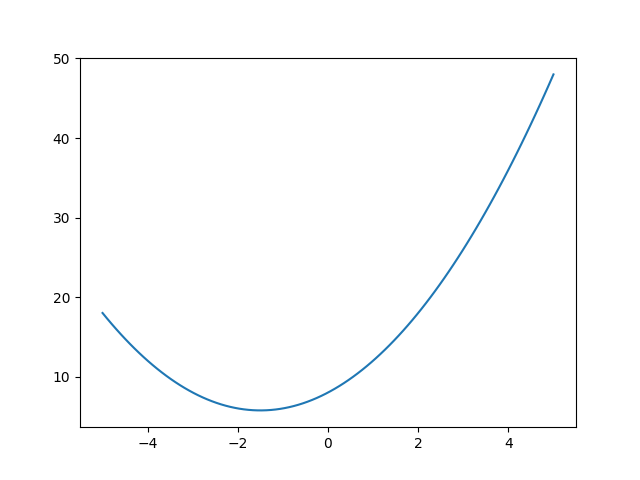

In [68]:

# Generate several values within a search 'space' and check whether the new value is better
# than the best seen so far.
bestx1 = 4

#setting the figure and axis for animation
fig1, ax1 = plt.subplots()
ax1.plot(x_value1 , y_value1)
xall1, yall1 = [], []                                # making the empty list given to lnall and lngood
lnall1,  = ax1.plot([], [], 'ro')                    # this gives the priviously encountered points with red dot
lngood1, = ax1.plot([], [], 'go', markersize=10)     # this gives the new lowest point with green dot 

# Learning rate 
lr1 = 0.2

# defining function which actully append the latest values of x and y and plot it
def onestepderiv(frame):
    global bestx1, lr1
    x1 = bestx1 - df1_dx(bestx1) * lr1               # making change in x value depending on the slope of graph at that point
    bestx1 = x1                                      # assigning the new x value
    y1 = f1(x1)                                      # finding new y value
    lngood1.set_data(x1, y1)                         # assigning new x and y values to lngood 
    xall1.append(x1)                                 # appending the new x value to the empty list
    yall1.append(y1)                                 # appending the new y value to the empty list
    lnall1.set_data(xall1, yall1)                    # assigning latest list to lnall 
    # return lngood,

# plotting using FuncAnimation
ani= FuncAnimation(fig1, onestepderiv, frames=range(30), interval=1000, repeat=False)
plt.show()

In this section we are dealing with the animation part, and getting the minimum value.

First we take the best x value so that the function settles down at the absolute minimum. Then we set the figure and axis for plotting. We make two empty list, to which the latest x and y values are to be appended. Then we plot the recent minimum point with green dot,and in the next frame when we get new lowest point we represent it with green dot and the previous lowest point with red dot.

We then set learning rate to a value. This along with the derivative at that point represent the rate at which the value of x will decrease.

Then we make a function to which frames are given as input and at each frame we get a new lowest point.
In this function we find the new x value by subtacting the multiplication product of learning rate and derivaitve of that function from the old x value.
Then we find new y value by puttng the new x value in the function f1().
Then we update the lnall and lngood values with the new x and y values.

At last we get the animation using the FuncAnimation() function.

## Problem 2 - 2-D polynomial

Functions for derivatives, as well as the range of values within which to search for the minimum, are given.

In [69]:
# Importing required libraries and module 
import numpy as np
from numpy import cos, sin, pi, exp 
%matplotlib ipympl
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import cm

In this section we are importing the required modules like 'numpy', 'matplotlib' etc.

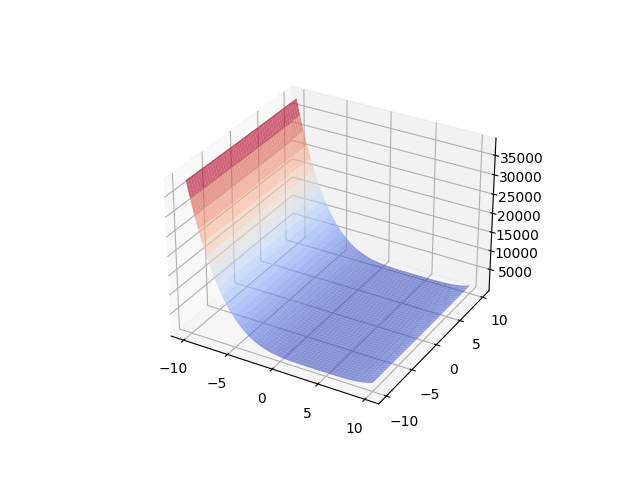

In [70]:
# defining the given function with two variables
def f3(x, y):
    return x**4 - 16*x**3 + 96*x**2 - 256*x + y**2 - 4*y + 262

# defining the derivative of the given function
def df3(x,y):
    arr1 = [4*x**3 - 48*x**2 + 192*x - 256, 2*y - 4] # putting the x derivative to first element of list and y derivative to second element of list
    return arr1


# setting the figure and axis for 3D projection
fig2 = plt.figure()
ax2 = plt.axes(projection='3d')

# assinging the value of x and y variable in the given range
x_value2 = np.linspace(-10,10,1000)
y_value2 = np.linspace(-10,10,1000)

# Plotting the 3D surface of the given function
X2,Y2 = np.meshgrid(x_value2,y_value2)
Z2 = f3(X2,Y2)
ax2.plot_surface(X2,Y2,Z2, cmap = cm.coolwarm, alpha = 0.6)


xall2, yall2,zall2 = [], [], []                      # making the empty list given to lnall and lngood
lnall2,  = ax2.plot([], [], 'ro')                    # this gives the priviously encountered points with red dot
lngood2, = ax2.plot([], [], 'go', markersize=10)     # this gives the new lowest point with green dot 

# setting learning rate
lr2 = 0.0005

# setting intial x and y value
bestx2 = -10
besty2 = 0

# defining function which actully append the latest values of x and y and plot it
def onestepderiv(frame):
    global bestx2,besty2, lr2
    x2 = bestx2 - df3(bestx2,besty2)[0] * lr2         # making change in x value depending on the slope of graph at that point
    bestx2 = x2                                       # assigning the new x value
    y2 = besty2 - df3(bestx2,besty2)[1] * lr2         # making change in y value depending on the slope of graph at that point
    besty2 = y2                                       # assigning the new y value
    z2 = f3(x2,y2)                                    # finding new z value
   
    lngood2.set_data([x2],[y2])                       # assigning new x and y values to lngood 
    lngood2.set_3d_properties([z2])                   # assigning new z value to lngood 
        
    xall2.append(x2)                                  # appending the new x value to the empty list
    yall2.append(y2)                                  # appending the new y value to the empty list
    zall2.append(z2)                                  # appending the new z value to the empty list
    
    lnall2.set_data(xall2, yall2)                     # assigning latest list for x and y to lnall 
    lnall2.set_3d_properties(zall2)                   # assigning latest list for z to lnall 


    # return lngood,

# plotting using FuncAnimation
ani= FuncAnimation(fig2, onestepderiv, frames=range(10), interval=1000, repeat=False)
plt.show()

In this sectionn we define the given two variable polynomial function f3(), which has to be optimized. 
After that we define another function df3, which is the derivative function of f3() function. This function returns a list which first element is the deivative of f3() with respect to x and the second element is with respect to y.

Then we set the axis and figure for 3D animation. Then we assign the x and y axis values and plot the surface of the function.
We make two empty list, to which the latest x, y and z values are to be appended. Then we plot the recent minimum point with green dot,and in the next frame when we get new lowest point we represent it with green dot and the previous lowest point with red dot.

Then we define the intial best x value and y value.
We then set learning rate to a value. This along with the derivative at that point represent the rate at which the value of x will decrease.

Then we make a function to which frames are given as input and at each frame we get a new lowest point.
In this function we find the new x value by subtacting the multiplication product of learning rate and derivaitve of that function from the old x value.
Similarly we find the new y value by subtacting the multiplication product of learning rate and derivaitve of that function from the old y value.
Then we find new z value by puttng the new x value and new y value in the function f3().
Then we update the lnall and lngood values with the new x and y values.

At last we get the animation using the FuncAnimation() function.

## Problem 3 - 2-D function 

Derivatives and limits given. 

In [71]:
# Importing required libraries and module 
import numpy as np
from numpy import cos, sin, pi, exp 
%matplotlib ipympl
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import cm

In this section we are importing the required modules like 'numpy', 'matplotlib' etc.

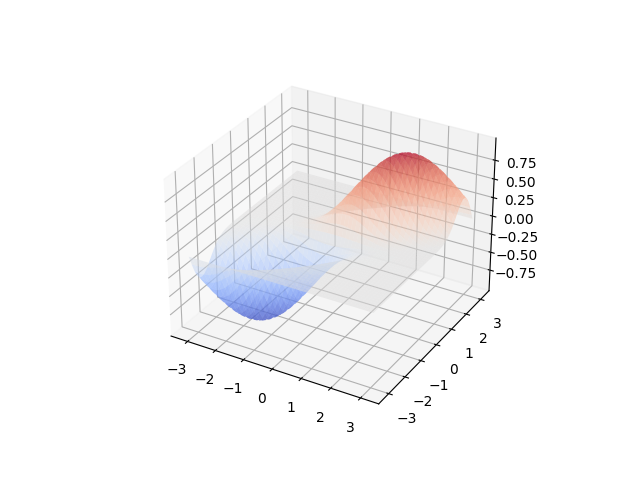

In [72]:
# defining the given function with two variables
def f4(x,y):
    return exp(-(x - y)**2)*sin(y)

# defining the derivative of the given function
def df4(x,y):
    arr2 = [-2*exp(-(x - y)**2)*sin(y)*(x - y), exp(-(x - y)**2)*cos(y) + 2*exp(-(x - y)**2)*sin(y)*(x - y)]
    return arr2

# setting the figure and axis for 3D projection
fig3 = plt.figure()
ax3 = plt.axes(projection='3d')

# assinging the value of x and y variable in the given range
x_value3 = np.linspace(-pi,pi,100)
y_value3 = np.linspace(-pi,pi,100)

# Plotting the 3D surface of the given function
X3,Y3 = np.meshgrid(x_value3, y_value3)
Z3 = f4(X3,Y3)
ax3.plot_surface(X3, Y3, Z3, cmap = cm.coolwarm, alpha = 0.5)


xall3, yall3, zall3 = [], [], []                       # making the empty list given to lnall and lngood
lnall3,  = ax3.plot([], [],[], 'ro')                   # this gives the priviously encountered points with red dot
lngood3, = ax3.plot([], [],[], 'go', markersize=10)    # this gives the new lowest point with green dot 

# learning rate
lr3 = 0.1

# setting intial x and y value
bestx3 = -0.5
besty3 = -0.5

# defining function which actully append the latest values of x and y and plot it
def onestepderiv(frame):
    global bestx3, besty3, lr3
    x3 = bestx3 - df4(bestx3, besty3)[0] * lr3      # making change in x value depending on the slope of graph at that point
    bestx3 = x3                                     # assigning the new x value
    y3 = besty3 - df4(bestx3, besty3)[1] * lr3      # making change in y value depending on the slope of graph at that point
    besty3 = y3                                     # assigning the new y value
    z3 = f4(x3, y3)                                 # finding new z value
   
    lngood3.set_data([x3],[y3])                     # assigning new x and y values to lngood 
    lngood3.set_3d_properties([z3])                 # assigning new z value to lngood 
       
    xall3.append(x3)                                # appending the new x value to the empty list
    yall3.append(y3)                                # appending the new y value to the empty list
    zall3.append(z3)                                # appending the new z value to the empty list
   
    lnall3.set_data(xall3, yall3)                   # assigning latest list for x and y to lnall 
    lnall3.set_3d_properties(zall3)                 # assigning latest list for z to lnall 


    # return lngood,

    
# plotting using FuncAnimation
ani= FuncAnimation(fig3, onestepderiv, frames=range(100), interval=1000, repeat=False)
plt.show()

In this sectionn we define the given two variable polynomial function f3(), which has to be optimized. 
After that we define another function df3, which is the derivative function of f3() function. This function returns a list which first element is the deivative of f3() with respect to x and the second element is with respect to y.

Then we set the axis and figure for 3D animation. Then we assign the x and y axis values and plot the surface of the function.
We make two empty list, to which the latest x, y and z values are to be appended. Then we plot the recent minimum point with green dot,and in the next frame when we get new lowest point we represent it with green dot and the previous lowest point with red dot.

Then we define the intial best x value and y value.
We then set learning rate to a value. This along with the derivative at that point represent the rate at which the value of x will decrease.

Then we make a function to which frames are given as input and at each frame we get a new lowest point.
In this function we find the new x value by subtacting the multiplication product of learning rate and derivaitve of that function from the old x value.
Similarly we find the new y value by subtacting the multiplication product of learning rate and derivaitve of that function from the old y value.
Then we find new z value by puttng the new x value and new y value in the function f3().
Then we update the lnall and lngood values with the new x and y values.

At last we get the animation using the FuncAnimation() function.

## Problem 4 - 1-D trigonometric

Derivative not given.  Optimization range [0, 2*pi]

In [73]:
# Importing required libraries and module 
import numpy as np
from numpy import cos, sin, pi, exp 
%matplotlib ipympl
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import cm

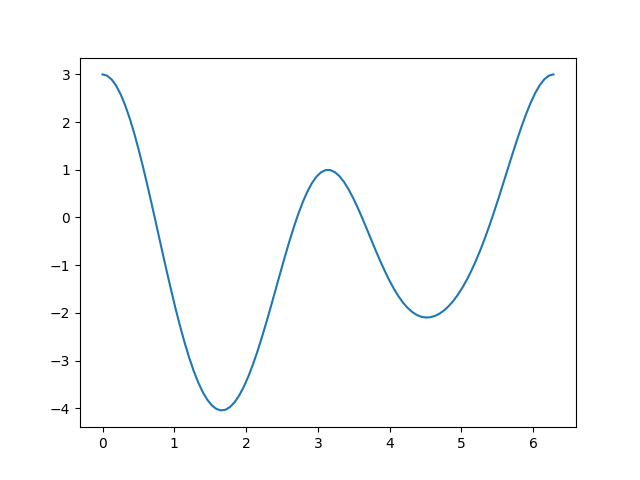

In [74]:
# defining single variable polynoimal function
def f5(x):
    return cos(x)**4 - sin(x)**3 - 4*sin(x)**2 + cos(x) + 1

# defining the derivative function of the polynomial function
def df5_dx(x):
    arr = -4*cos(x)**3 * sin(x) - 3*sin(x)**2 * cos(x) - 8*sin(x) * cos(x) - sin(x)
    return arr

# setting the x-axis and y-axis values in the given limit
x_value4 = np.linspace(0 , 2*pi, 100)
y_value4 = f5(x_value4)

# plotting the function
plt.plot(x_value4 , y_value4)
plt.show()

In this sectionn we define the given single variable polynomial function f4(), which has to be optimized. 
After that we define another function df1_dx, which is the derivative function of f4() function.

Then we generate random input array for x-axis values and by putting it in f4() we get the y-axis values.
Then using plt.plot() we plot the function.


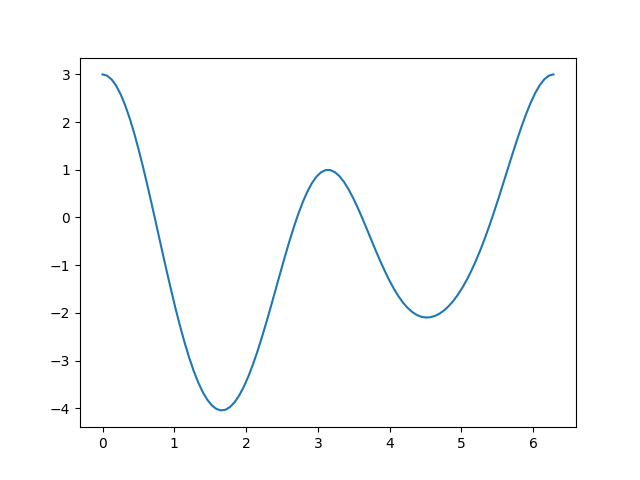

In [75]:

# Generate several values within a search 'space' and check whether the new value is better
# than the best seen so far.
bestx4 = pi-0.01

#setting the figure and axis for animation
fig4, ax4 = plt.subplots()
ax4.plot(x_value4 , y_value4)
xall4, yall4 = [], []                                # making the empty list given to lnall and lngood
lnall4,  = ax4.plot([], [], 'ro')                    # this gives the priviously encountered points with red dot
lngood4, = ax4.plot([], [], 'go', markersize=10)     # this gives the new lowest point with green dot 


# Learning rate 
lr4 = 0.1

# defining function which actully append the latest values of x and y and plot it
def onestepderiv(frame):
    global bestx4, lr4
    x4 = bestx4 - df5_dx(bestx4) * lr4            # making change in x value depending on the slope of graph at that point
    bestx4 = x4                                      # assigning the new x value
    y4 = f5(x4)                                      # finding new y value
    lngood4.set_data(x4, y4)                         # assigning new x and y values to lngood 
    xall4.append(x4)                                 # appending the new x value to the empty list
    yall4.append(y4)                                 # appending the new y value to the empty list
    lnall4.set_data(xall4, yall4)                    # assigning latest list to lnall 
    print(yall4)
# plotting using FuncAnimation
ani= FuncAnimation(fig4, onestepderiv, frames=range(30), interval=1000, repeat=False)
plt.show()


In this section we are dealing with the animation part, and getting the minimum value.

First we take the best x value so that the function settles down at the absolute minimum. Then we set the figure and axis for plotting. We make two empty list, to which the latest x and y values are to be appended. Then we plot the recent minimum point with green dot,and in the next frame when we get new lowest point we represent it with green dot and the previous lowest point with red dot.

We then set learning rate to a value. This along with the derivative at that point represent the rate at which the value of x will decrease.

Then we make a function to which frames are given as input and at each frame we get a new lowest point.
In this function we find the new x value by subtacting the multiplication product of learning rate and derivaitve of that function from the old x value.
Then we find new y value by puttng the new x value in the function f4().
Then we update the lnall and lngood values with the new x and y values.

At last we get the animation using the FuncAnimation() function.

# Generic Function for one variable

MovieWriter ffmpeg unavailable; using Pillow instead.


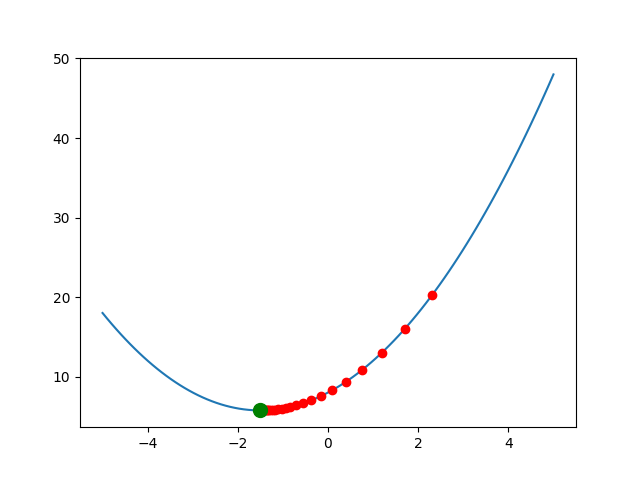

The minimum value is 5.7500000003648175


In [76]:
# Importing required libraries and module 
import numpy as np
from numpy import cos, sin, pi, exp 
%matplotlib ipympl
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import cm



def generic_func(f, df, a, b):
    x_value1 = np.linspace(a, b, 100)
    y_value1 = f(x_value1)
    # Generate several values within a search 'space' and check whether the new value is better
    # than the best seen so far.
    bestx1 = pi- 0.1

    #setting the figure and axis for animation
    fig1, ax1 = plt.subplots()
    ax1.plot(x_value1 , y_value1)
    xall1, yall1 = [], []                                # making the empty list given to lnall and lngood
    lnall1,  = ax1.plot([], [], 'ro')                    # this gives the priviously encountered points with red dot
    lngood1, = ax1.plot([], [], 'go', markersize=10)     # this gives the new lowest point with green dot 

    # Learning rate 
    lr1 = 0.08

    # defining function which actully append the latest values of x and y and plot it
    def step(frame):
        nonlocal bestx1, lr1
        x1 = bestx1 - df(bestx1) * lr1                   # making change in x value depending on the slope of graph at that point
        bestx1 = x1                                      # assigning the new x value
        y1 = f(x1)                                       # finding new y value
        lngood1.set_data(x1, y1)                         # assigning new x and y values to lngood 
        xall1.append(x1)                                 # appending the new x value to the empty list
        yall1.append(y1)                                 # appending the new y value to the empty list
        lnall1.set_data(xall1, yall1)                    # assigning latest list to lnall 
        #return lngood1,
        
    # plotting using FuncAnimation
    ani = FuncAnimation(fig1, step, frames=range(70), interval=1000, repeat=False)
    ani.save('jo.gif')
    plt.show()
    
    for i in range(1000):
        k = bestx1
    
    print(f"The minimum value is {f(k)}")
    
        

generic_func(f1, df1_dx, -5, 5)



Here we have made the generic function for optimizing the one variable functions.

Here we define a function to which a function, which is to be optimized, it's derivative and the range within which it should be optimized are given as argument.

In the body of the function we follow the same procedure stated above for one variable optimization.

Then we can give any function with one variable, it's derivative and range of search as argument and find it's optimized value.

At last we find the the bestx value at which the function has minimum value, we put the value in the function and find the optimum(minimum) value.

# Generic Function for two variables

MovieWriter ffmpeg unavailable; using Pillow instead.


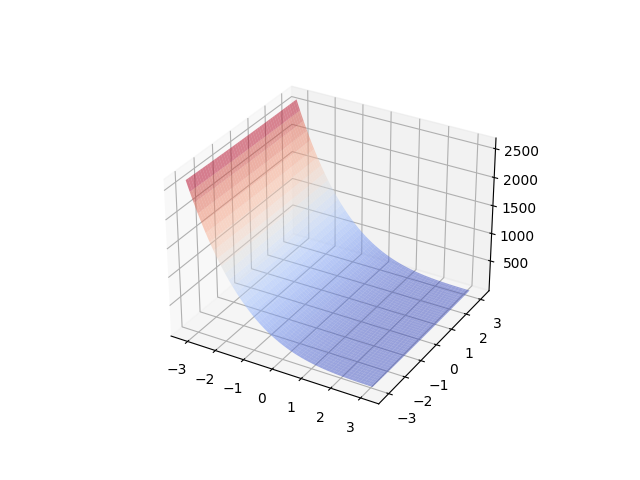

 The minimum value is 418.3125


In [78]:
# Importing required libraries and module 
import numpy as np
from numpy import cos, sin, pi, exp 
%matplotlib ipympl
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import cm


    
def generic_func2(f_1, df_1, m, n):
    # setting the figure and axis for 3D projection
    fig3 = plt.figure()
    ax3 = plt.axes(projection='3d')

    # assinging the value of x and y variable in the given range
    x_value3 = np.linspace(m,n,100)
    y_value3 = np.linspace(m,n,100)

    # Plotting the 3D surface of the given function
    X3,Y3 = np.meshgrid(x_value3, y_value3)
    Z3 = f_1(X3,Y3)
    ax3.plot_surface(X3, Y3, Z3, cmap = cm.coolwarm, alpha = 0.5)


    xall3, yall3, zall3 = [], [], []                       # making the empty list given to lnall and lngood
    lnall3,  = ax3.plot([], [],[], 'ro')                   # this gives the priviously encountered points with red dot
    lngood3, = ax3.plot([], [],[], 'go', markersize=10)    # this gives the new lowest point with green dot 

    # learning rate
    lr3 = 0.1

    # setting intial x and y value
    bestx3 = -0.5
    besty3 = -0.5

    # defining function which actully append the latest values of x and y and plot it
    def onestepderiv(frame):
        global bestx3, besty3, lr3
        x3 = bestx3 - df_1(bestx3, besty3)[0] * lr3     # making change in x value depending on the slope of graph at that point
        bestx3 = x3                                     # assigning the new x value
        y3 = besty3 - df_1(bestx3, besty3)[1] * lr3     # making change in y value depending on the slope of graph at that point
        besty3 = y3                                     # assigning the new y value
        z3 = f_1(x3, y3)                                 # finding new z value

        lngood3.set_data([x3],[y3])                     # assigning new x and y values to lngood 
        lngood3.set_3d_properties([z3])                 # assigning new z value to lngood 

        xall3.append(x3)                                # appending the new x value to the empty list
        yall3.append(y3)                                # appending the new y value to the empty list
        zall3.append(z3)                                # appending the new z value to the empty list

        lnall3.set_data(xall3, yall3)                   # assigning latest list for x and y to lnall 
        lnall3.set_3d_properties(zall3)                 # assigning latest list for z to lnall 


        # return lngood,


    # plotting using FuncAnimation
    ani= FuncAnimation(fig3, onestepderiv, frames=range(100), interval=1000, repeat=False)
    ani.save('jo1.gif')
    plt.show()
             
    for i in range(100):
        p = bestx3
        q = besty3
    print(f" The minimum value is {f_1(p,q)}")
             
generic_func2(f3, df3, -pi, pi)

Here we have made the generic function for optimizing the one variable functions.

Here we define a function to which a function, which is to be optimized, it's derivative and the range within which it should be optimized are given as argument.

In the body of the function we follow the same procedure stated above for one variable optimization.

Then we can give any function with one variable, it's derivative and range of search as argument and find it's optimized value.

At last we find the the bestx value at which the function has minimum value, we put the value in the function and find the optimum(minimum) value.